## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


model = build_mlp()

In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, #原始=100
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 2s 11ms/step - loss: 1.9111 - accuracy: 0.3112 - val_loss: 1.7808 - val_accuracy: 0.3465
Epoch 2/500
196/196 [==============================] - 2s 11ms/step - loss: 1.6916 - accuracy: 0.3943 - val_loss: 1.6332 - val_accuracy: 0.4169
Epoch 3/500
196/196 [==============================] - 2s 11ms/step - loss: 1.6128 - accuracy: 0.4235 - val_loss: 1.6329 - val_accuracy: 0.4101
Epoch 4/500
196/196 [==============================] - 2s 11ms/step - loss: 1.5525 - accuracy: 0.4467 - val_loss: 1.5114 - val_accuracy: 0.4642
Epoch 5/500
196/196 [==============================] - 2s 11ms/step - loss: 1.5015 - accuracy: 0.4639 - val_loss: 1.5027 - val_accuracy: 0.4596
Epoch 6/500
196/196 [==============================] - 2s 11ms/step - loss: 1.4671 - accuracy: 0.4779 - val_loss: 1.4833 - val_accuracy: 0.4732
Epoch 7/500
196/196 [==============================] - 2s 11ms/step - loss: 1.4259 - accuracy: 0.4910 - val_loss: 1.4654 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 0.5572 - accuracy: 0.8014 - val_loss: 2.0243 - val_accuracy: 0.5062
Epoch 58/500
196/196 [==============================] - 2s 11ms/step - loss: 0.5461 - accuracy: 0.8067 - val_loss: 1.9818 - val_accuracy: 0.5053
Epoch 59/500
196/196 [==============================] - 2s 11ms/step - loss: 0.5259 - accuracy: 0.8122 - val_loss: 2.0300 - val_accuracy: 0.5158
Epoch 60/500
196/196 [==============================] - 2s 11ms/step - loss: 0.5293 - accuracy: 0.8117 - val_loss: 2.0667 - val_accuracy: 0.5125
Epoch 61/500
196/196 [==============================] - 2s 11ms/step - loss: 0.5078 - accuracy: 0.8177 - val_loss: 2.1256 - val_accuracy: 0.5138
Epoch 62/500
196/196 [==============================] - 2s 11ms/step - loss: 0.5074 - accuracy: 0.8190 - val_loss: 2.1374 - val_accuracy: 0.5074
Epoch 63/500
196/196 [==============================] - 2s 11ms/step - loss: 0.4964 - accuracy: 0.8237 - val_loss: 2.2138 - val_accuracy: 0.507

196/196 [==============================] - 2s 11ms/step - loss: 0.2625 - accuracy: 0.9071 - val_loss: 3.7400 - val_accuracy: 0.4977
Epoch 114/500
196/196 [==============================] - 2s 11ms/step - loss: 0.2717 - accuracy: 0.9021 - val_loss: 3.6953 - val_accuracy: 0.5034
Epoch 115/500
196/196 [==============================] - 2s 11ms/step - loss: 0.2380 - accuracy: 0.9145 - val_loss: 3.7513 - val_accuracy: 0.5037
Epoch 116/500
196/196 [==============================] - 2s 11ms/step - loss: 0.2209 - accuracy: 0.9203 - val_loss: 3.8428 - val_accuracy: 0.4951
Epoch 117/500
196/196 [==============================] - 2s 11ms/step - loss: 0.2287 - accuracy: 0.9169 - val_loss: 3.8930 - val_accuracy: 0.4983
Epoch 118/500
196/196 [==============================] - 2s 11ms/step - loss: 0.2381 - accuracy: 0.9151 - val_loss: 3.8825 - val_accuracy: 0.5007
Epoch 119/500
196/196 [==============================] - 2s 11ms/step - loss: 0.2812 - accuracy: 0.8994 - val_loss: 3.9048 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 0.1750 - accuracy: 0.9387 - val_loss: 5.1913 - val_accuracy: 0.4906
Epoch 170/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1357 - accuracy: 0.9516 - val_loss: 5.0082 - val_accuracy: 0.4964
Epoch 171/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1127 - accuracy: 0.9606 - val_loss: 5.0413 - val_accuracy: 0.4954
Epoch 172/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1257 - accuracy: 0.9552 - val_loss: 5.2232 - val_accuracy: 0.4968
Epoch 173/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1940 - accuracy: 0.9320 - val_loss: 5.1329 - val_accuracy: 0.4957
Epoch 174/500
196/196 [==============================] - 2s 11ms/step - loss: 0.2078 - accuracy: 0.9265 - val_loss: 5.0900 - val_accuracy: 0.4930
Epoch 175/500
196/196 [==============================] - 2s 11ms/step - loss: 0.2130 - accuracy: 0.9267 - val_loss: 5.0297 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 0.1238 - accuracy: 0.9561 - val_loss: 5.9734 - val_accuracy: 0.4945
Epoch 226/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1876 - accuracy: 0.9365 - val_loss: 5.9711 - val_accuracy: 0.4996
Epoch 227/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1489 - accuracy: 0.9485 - val_loss: 5.8152 - val_accuracy: 0.5019
Epoch 228/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1206 - accuracy: 0.9580 - val_loss: 6.1212 - val_accuracy: 0.4927
Epoch 229/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1763 - accuracy: 0.9411 - val_loss: 6.2155 - val_accuracy: 0.4910
Epoch 230/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1299 - accuracy: 0.9556 - val_loss: 6.1055 - val_accuracy: 0.4929
Epoch 231/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0782 - accuracy: 0.9720 - val_loss: 6.2165 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 0.0901 - accuracy: 0.9703 - val_loss: 6.8865 - val_accuracy: 0.4940
Epoch 282/500
196/196 [==============================] - 2s 11ms/step - loss: 0.2541 - accuracy: 0.9233 - val_loss: 6.7264 - val_accuracy: 0.4887
Epoch 283/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1971 - accuracy: 0.9365 - val_loss: 6.4672 - val_accuracy: 0.4889
Epoch 284/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1051 - accuracy: 0.9653 - val_loss: 6.5645 - val_accuracy: 0.4969
Epoch 285/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0672 - accuracy: 0.9773 - val_loss: 6.7438 - val_accuracy: 0.4982
Epoch 286/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0581 - accuracy: 0.9804 - val_loss: 6.7423 - val_accuracy: 0.4958
Epoch 287/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0427 - accuracy: 0.9857 - val_loss: 6.7911 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 0.1635 - accuracy: 0.9489 - val_loss: 7.1082 - val_accuracy: 0.4943
Epoch 338/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0657 - accuracy: 0.9784 - val_loss: 7.0984 - val_accuracy: 0.4995
Epoch 339/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0545 - accuracy: 0.9816 - val_loss: 7.3945 - val_accuracy: 0.5002
Epoch 340/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0524 - accuracy: 0.9817 - val_loss: 7.3044 - val_accuracy: 0.4956
Epoch 341/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0939 - accuracy: 0.9685 - val_loss: 7.3268 - val_accuracy: 0.4985
Epoch 342/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1858 - accuracy: 0.9436 - val_loss: 7.3529 - val_accuracy: 0.4946
Epoch 343/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1001 - accuracy: 0.9664 - val_loss: 7.1653 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 0.0934 - accuracy: 0.9682 - val_loss: 6.8218 - val_accuracy: 0.4939
Epoch 394/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0389 - accuracy: 0.9876 - val_loss: 7.1321 - val_accuracy: 0.4987
Epoch 395/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0195 - accuracy: 0.9944 - val_loss: 7.1982 - val_accuracy: 0.5010
Epoch 396/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0527 - accuracy: 0.9818 - val_loss: 7.2787 - val_accuracy: 0.4908
Epoch 397/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1945 - accuracy: 0.9407 - val_loss: 7.3611 - val_accuracy: 0.4781
Epoch 398/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1480 - accuracy: 0.9544 - val_loss: 7.0436 - val_accuracy: 0.4949
Epoch 399/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0513 - accuracy: 0.9828 - val_loss: 7.1398 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 0.0053 - accuracy: 0.9993 - val_loss: 7.4507 - val_accuracy: 0.5018
Epoch 450/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0035 - accuracy: 0.9997 - val_loss: 7.4400 - val_accuracy: 0.5062
Epoch 451/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0042 - accuracy: 0.9995 - val_loss: 7.5043 - val_accuracy: 0.5066
Epoch 452/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0030 - accuracy: 0.9998 - val_loss: 7.5968 - val_accuracy: 0.5064
Epoch 453/500
196/196 [==============================] - 2s 11ms/step - loss: 0.3567 - accuracy: 0.9259 - val_loss: 6.5346 - val_accuracy: 0.4672
Epoch 454/500
196/196 [==============================] - 2s 11ms/step - loss: 0.3260 - accuracy: 0.9101 - val_loss: 6.4233 - val_accuracy: 0.4882
Epoch 455/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0696 - accuracy: 0.9767 - val_loss: 6.6544 - val_accuracy:

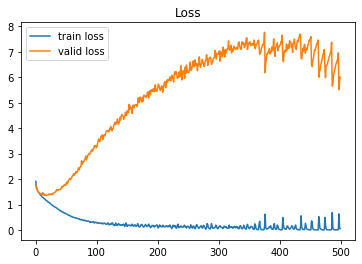

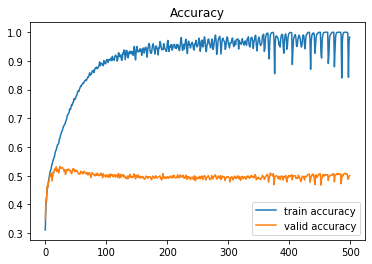

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

由此可以發現，就算增加epoch，仍然是過擬合

# Epoch = 500, Optimizer = 'SGD'

In [8]:
model = build_mlp()


# SGD class
# tf.keras.optimizers.SGD(
#     learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD", **kwargs
# )

optimizer = keras.optimizers.SGD(lr=0.001, momentum = 0.0, nesterov = False)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=500, #原始=100
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 2s 9ms/step - loss: 2.2637 - accuracy: 0.1514 - val_loss: 2.2052 - val_accuracy: 0.2020
Epoch 2/500
196/196 [==============================] - 2s 8ms/step - loss: 2.1733 - accuracy: 0.2184 - val_loss: 2.1412 - val_accuracy: 0.2317
Epoch 3/500
196/196 [==============================] - 2s 9ms/step - loss: 2.1139 - accuracy: 0.2479 - val_loss: 2.0874 - val_accuracy: 0.2573
Epoch 4/500
196/196 [==============================] - 2s 9ms/step - loss: 2.0641 - accuracy: 0.2702 - val_loss: 2.0423 - val_accuracy: 0.2832
Epoch 5/500
196/196 [==============================] - 2s 9ms/step - loss: 2.0233 - accuracy: 0.2904 - val_loss: 2.0061 - val_accuracy: 0.2959
Epoch 6/500
196/196 [==============================] - 2s 9ms/step - loss: 1.9913 - accuracy: 0.3001 - val_loss: 1.9774 - val_accuracy: 0.3099
Epoch 7/500
196/196 [==============================] - 2s 9ms/step - loss: 1.9651 - accuracy: 0.3123 - val_loss: 1.9544 - val_accuracy: 0.3136

Epoch 58/500
196/196 [==============================] - 2s 8ms/step - loss: 1.6449 - accuracy: 0.4286 - val_loss: 1.6512 - val_accuracy: 0.4234
Epoch 59/500
196/196 [==============================] - 2s 8ms/step - loss: 1.6419 - accuracy: 0.4291 - val_loss: 1.6501 - val_accuracy: 0.4242
Epoch 60/500
196/196 [==============================] - 2s 8ms/step - loss: 1.6387 - accuracy: 0.4300 - val_loss: 1.6458 - val_accuracy: 0.4289
Epoch 61/500
196/196 [==============================] - 2s 9ms/step - loss: 1.6357 - accuracy: 0.4317 - val_loss: 1.6423 - val_accuracy: 0.4276
Epoch 62/500
196/196 [==============================] - 2s 9ms/step - loss: 1.6327 - accuracy: 0.4319 - val_loss: 1.6416 - val_accuracy: 0.4304
Epoch 63/500
196/196 [==============================] - 2s 9ms/step - loss: 1.6301 - accuracy: 0.4338 - val_loss: 1.6377 - val_accuracy: 0.4255
Epoch 64/500
196/196 [==============================] - 2s 8ms/step - loss: 1.6271 - accuracy: 0.4339 - val_loss: 1.6337 - val_accuracy:

Epoch 115/500
196/196 [==============================] - 2s 8ms/step - loss: 1.5127 - accuracy: 0.4729 - val_loss: 1.5378 - val_accuracy: 0.4603
Epoch 116/500
196/196 [==============================] - 2s 9ms/step - loss: 1.5107 - accuracy: 0.4740 - val_loss: 1.5389 - val_accuracy: 0.4589
Epoch 117/500
196/196 [==============================] - 2s 9ms/step - loss: 1.5088 - accuracy: 0.4745 - val_loss: 1.5364 - val_accuracy: 0.4610
Epoch 118/500
196/196 [==============================] - 2s 10ms/step - loss: 1.5072 - accuracy: 0.4755 - val_loss: 1.5342 - val_accuracy: 0.4629
Epoch 119/500
196/196 [==============================] - 2s 10ms/step - loss: 1.5053 - accuracy: 0.4753 - val_loss: 1.5352 - val_accuracy: 0.4604
Epoch 120/500
196/196 [==============================] - 2s 9ms/step - loss: 1.5037 - accuracy: 0.4762 - val_loss: 1.5322 - val_accuracy: 0.4581
Epoch 121/500
196/196 [==============================] - 2s 9ms/step - loss: 1.5019 - accuracy: 0.4776 - val_loss: 1.5319 - val_

196/196 [==============================] - 2s 9ms/step - loss: 1.4226 - accuracy: 0.5050 - val_loss: 1.4748 - val_accuracy: 0.4823
Epoch 172/500
196/196 [==============================] - 2s 8ms/step - loss: 1.4212 - accuracy: 0.5043 - val_loss: 1.4720 - val_accuracy: 0.4823
Epoch 173/500
196/196 [==============================] - 2s 8ms/step - loss: 1.4196 - accuracy: 0.5061 - val_loss: 1.4780 - val_accuracy: 0.4773
Epoch 174/500
196/196 [==============================] - 2s 9ms/step - loss: 1.4182 - accuracy: 0.5046 - val_loss: 1.4768 - val_accuracy: 0.4775
Epoch 175/500
196/196 [==============================] - 2s 8ms/step - loss: 1.4168 - accuracy: 0.5051 - val_loss: 1.4718 - val_accuracy: 0.4813
Epoch 176/500
196/196 [==============================] - 2s 8ms/step - loss: 1.4156 - accuracy: 0.5065 - val_loss: 1.4676 - val_accuracy: 0.4838
Epoch 177/500
196/196 [==============================] - 2s 8ms/step - loss: 1.4137 - accuracy: 0.5072 - val_loss: 1.4707 - val_accuracy: 0.4790

196/196 [==============================] - 2s 9ms/step - loss: 1.3463 - accuracy: 0.5296 - val_loss: 1.4275 - val_accuracy: 0.4928
Epoch 228/500
196/196 [==============================] - 2s 8ms/step - loss: 1.3452 - accuracy: 0.5304 - val_loss: 1.4255 - val_accuracy: 0.4958
Epoch 229/500
196/196 [==============================] - 2s 8ms/step - loss: 1.3440 - accuracy: 0.5303 - val_loss: 1.4280 - val_accuracy: 0.4953
Epoch 230/500
196/196 [==============================] - 2s 8ms/step - loss: 1.3420 - accuracy: 0.5315 - val_loss: 1.4225 - val_accuracy: 0.4963
Epoch 231/500
196/196 [==============================] - 2s 8ms/step - loss: 1.3406 - accuracy: 0.5323 - val_loss: 1.4297 - val_accuracy: 0.4930
Epoch 232/500
196/196 [==============================] - 2s 8ms/step - loss: 1.3396 - accuracy: 0.5331 - val_loss: 1.4183 - val_accuracy: 0.4941
Epoch 233/500
196/196 [==============================] - 2s 8ms/step - loss: 1.3385 - accuracy: 0.5336 - val_loss: 1.4241 - val_accuracy: 0.4971

196/196 [==============================] - 2s 8ms/step - loss: 1.2767 - accuracy: 0.5541 - val_loss: 1.3892 - val_accuracy: 0.5080
Epoch 284/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2760 - accuracy: 0.5554 - val_loss: 1.3949 - val_accuracy: 0.5053
Epoch 285/500
196/196 [==============================] - 2s 8ms/step - loss: 1.2743 - accuracy: 0.5546 - val_loss: 1.4066 - val_accuracy: 0.5034
Epoch 286/500
196/196 [==============================] - 2s 8ms/step - loss: 1.2739 - accuracy: 0.5552 - val_loss: 1.3853 - val_accuracy: 0.5076
Epoch 287/500
196/196 [==============================] - 2s 8ms/step - loss: 1.2726 - accuracy: 0.5551 - val_loss: 1.4246 - val_accuracy: 0.4987
Epoch 288/500
196/196 [==============================] - 2s 8ms/step - loss: 1.2724 - accuracy: 0.5560 - val_loss: 1.3824 - val_accuracy: 0.5103
Epoch 289/500
196/196 [==============================] - 2s 9ms/step - loss: 1.2699 - accuracy: 0.5573 - val_loss: 1.3869 - val_accuracy: 0.5088

196/196 [==============================] - 2s 9ms/step - loss: 1.2135 - accuracy: 0.5766 - val_loss: 1.3756 - val_accuracy: 0.5129
Epoch 340/500
196/196 [==============================] - 2s 8ms/step - loss: 1.2125 - accuracy: 0.5771 - val_loss: 1.3659 - val_accuracy: 0.5151
Epoch 341/500
196/196 [==============================] - 2s 8ms/step - loss: 1.2110 - accuracy: 0.5780 - val_loss: 1.4055 - val_accuracy: 0.5038
Epoch 342/500
196/196 [==============================] - 2s 8ms/step - loss: 1.2107 - accuracy: 0.5776 - val_loss: 1.3608 - val_accuracy: 0.5166
Epoch 343/500
196/196 [==============================] - 2s 8ms/step - loss: 1.2091 - accuracy: 0.5775 - val_loss: 1.3787 - val_accuracy: 0.5100
Epoch 344/500
196/196 [==============================] - 2s 8ms/step - loss: 1.2077 - accuracy: 0.5776 - val_loss: 1.3608 - val_accuracy: 0.5203
Epoch 345/500
196/196 [==============================] - 2s 8ms/step - loss: 1.2067 - accuracy: 0.5786 - val_loss: 1.3601 - val_accuracy: 0.5159

196/196 [==============================] - 2s 9ms/step - loss: 1.1546 - accuracy: 0.5976 - val_loss: 1.3841 - val_accuracy: 0.5136
Epoch 396/500
196/196 [==============================] - 2s 8ms/step - loss: 1.1540 - accuracy: 0.5973 - val_loss: 1.3574 - val_accuracy: 0.5235
Epoch 397/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1525 - accuracy: 0.5973 - val_loss: 1.3558 - val_accuracy: 0.5190
Epoch 398/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1516 - accuracy: 0.5981 - val_loss: 1.3720 - val_accuracy: 0.5156
Epoch 399/500
196/196 [==============================] - 2s 8ms/step - loss: 1.1493 - accuracy: 0.5992 - val_loss: 1.3546 - val_accuracy: 0.5214
Epoch 400/500
196/196 [==============================] - 2s 9ms/step - loss: 1.1493 - accuracy: 0.5986 - val_loss: 1.3853 - val_accuracy: 0.5138
Epoch 401/500
196/196 [==============================] - 2s 8ms/step - loss: 1.1483 - accuracy: 0.5979 - val_loss: 1.3383 - val_accuracy: 0.5231

196/196 [==============================] - 2s 8ms/step - loss: 1.0974 - accuracy: 0.6179 - val_loss: 1.3510 - val_accuracy: 0.5224
Epoch 452/500
196/196 [==============================] - 2s 9ms/step - loss: 1.0947 - accuracy: 0.6199 - val_loss: 1.3388 - val_accuracy: 0.5276
Epoch 453/500
196/196 [==============================] - 2s 8ms/step - loss: 1.0943 - accuracy: 0.6186 - val_loss: 1.3691 - val_accuracy: 0.5199
Epoch 454/500
196/196 [==============================] - 2s 8ms/step - loss: 1.0954 - accuracy: 0.6184 - val_loss: 1.3416 - val_accuracy: 0.5299
Epoch 455/500
196/196 [==============================] - 2s 8ms/step - loss: 1.0943 - accuracy: 0.6198 - val_loss: 1.3395 - val_accuracy: 0.5251
Epoch 456/500
196/196 [==============================] - 2s 9ms/step - loss: 1.0923 - accuracy: 0.6191 - val_loss: 1.3747 - val_accuracy: 0.5201
Epoch 457/500
196/196 [==============================] - 2s 8ms/step - loss: 1.0944 - accuracy: 0.6186 - val_loss: 1.3800 - val_accuracy: 0.5152

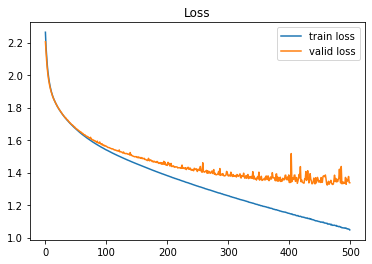

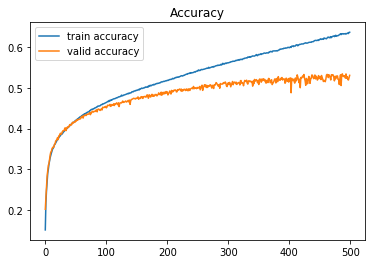

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

採用SGD的成果，並無發生過擬合的情形，只是預測能力還有機會再進行優化。